# **Confounding Variables - Identification and Adjustment**

Name: Poornachandraprasad Kongara <br>
NUID: 002778509

## **Abstract**

Confounding variables present a significant challenge in both research and decision-making, as they can obscure true causal relationships. In this notebook, I explore the concept of confounding variables, how to identify them, and ways to adjust for their effects. The notebook provides both theoretical explanations and practical coding examples to help clarify these concepts.

I also include two case studies to highlight the impact of confounding variables on research findings. These examples demonstrate the importance of addressing confounders to ensure accurate and reliable conclusions. Through this analysis, I aim to enhance understanding and promote rigorous methodology in research and policy development.




##**Understanding Variables in Causal Inference**
### What is Causal Inference?

Causal inference is a fundamental aspect of research and data analysis. It refers to the process of determining the cause-and-effect relationships between variables using observational data or experimental studies. Causal inference allows us to understand how one variable, known as the independent variable, can influence another, known as the dependent variable. The goal is to move beyond correlation and identify true causal relationships, which can inform decision-making and scientific conclusions.


### Introduction to Variables in Causal Inference

In causal inference, accurately identifying and understanding the role of different variables is essential for making valid conclusions about causal relationships. The three primary types of variables in this context are independent variables, dependent variables, and confounding variables. Let's break these down:

**Independent Variable: The Cause**

- The independent variable is the variable that the researcher manipulates or controls in an experiment to examine its potential effect on another variable (the dependent variable). It is the presumed cause in the causal relationship.<br>
- Example: Suppose you are conducting a study to assess how the dosage of a new drug influences recovery time after surgery.

- Independent Variable: The dosage of the new drug administered to patients.
The researcher intentionally varies this independent variable (e.g., giving different dosages to different patient groups) to determine its effect on the outcome of interest.

- In statistical models, the independent variable is often referred to as the predictor or treatment because it is expected to predict or influence changes in the dependent variable. This variable is typically controlled or altered during experiments.<br>

**Dependent Variable: The Effect**
- The dependent variable is the outcome variable that is expected to change as a result of variations in the independent variable. It represents the effect in the causal relationship.

- Example: Continuing with the drug study:
Dependent Variable: Recovery time after surgery.
The dependent variable is observed and measured in response to the manipulation of the independent variable. It reflects the impact or outcome that the researcher is trying to understand or predict.

- In statistical models, the dependent variable is often called the response variable because it responds to the changes made to the independent variable. The goal is to observe how variations in the independent variable influence this response.



In [ ]:
from google.colab import files
from PIL import Image

# Upload the image
uploaded = files.upload()

# Read and display the image
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
img = Image.open(image_path)

Saving Screenshot 2024-12-04 at 12.23.36 PM.png to Screenshot 2024-12-04 at 12.23.36 PM.png


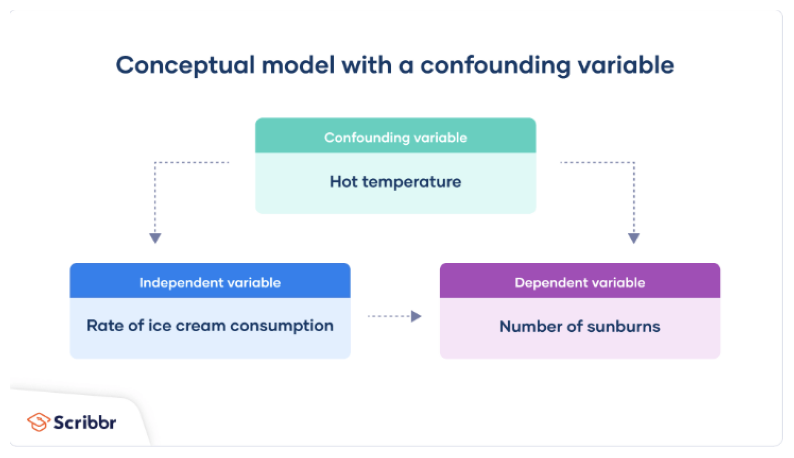

In [ ]:
# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img)

plt.axis('off')  # Hide axes for better visualization
plt.show()

## **Confounding Variables: The Hidden Influencers**

- Confounding variables are third-party variables that are not included in the analysis but still influence both the independent and dependent variables. These variables can obscure the true causal relationship between the independent and dependent variables, leading to biased or incorrect conclusions if not properly controlled for.

- Example: In the study on the effect of drug dosage on recovery time, suppose that the age of patients is also influencing recovery time, and older patients may take longer to recover than younger patients. If age is not controlled, it could appear as though the drug dosage is affecting recovery time more than it actually does.

- Confounding Variable: Age of the patients.

- Failing to account for confounding variables can lead to spurious associations between the independent and dependent variables, causing researchers to incorrectly attribute changes in the dependent variable to the independent variable when, in fact, another factor (the confounder) is responsible for the observed effect.

## **Data Preprocessing for Causal Inference**

**Why Preprocessing is Important:**<br>
- Data preprocessing ensures that the data is in a form that allows reliable causal inferences. Preprocessing steps include handling missing data, selecting features, and encoding variables, all of which can have a significant impact on the results of causal analyses.

- Key Preprocessing Techniques in a Causal Framework:<br>

**Handling Missing Data**<br>
Missing data is common in real-world datasets, and it must be handled properly to avoid introducing bias or distorting causal relationships.

Methods for Handling Missing Data:

1. Imputation: Replacing missing values with statistical estimates (mean, median, mode, or more advanced methods like multiple imputation).
Deletion: Removing rows or columns with missing data, although this could lead to a loss of information or introduce bias if the data isn't missing completely at random.
2. Model-Based Imputation: Using algorithms like k-Nearest Neighbors (KNN) or regression models to predict and fill in missing values.
Impact on Causal Inference: If missing data is related to the outcome or treatment, imputation can introduce bias. This must be accounted for by choosing appropriate imputation methods or using techniques like causal inference with missing data.

**Feature Selection**<br>
In causal analysis, it's crucial to select features that are relevant to the causal relationship being examined while excluding irrelevant or redundant variables.

Methods of Feature Selection:

- Correlation Analysis: Identify features that correlate highly with the outcome or treatment.
- Domain Expertise: Use knowledge of the field to select variables that are theoretically relevant to the causal question.
- Statistical Tests: Use tests like the Chi-square test or ANOVA to check for the statistical significance of features.
- Regularization Techniques: Techniques like Lasso regression can help eliminate irrelevant variables and prevent overfitting.
- Feature Selection in Causal Frameworks: Selecting features based on causality ensures that the relationships between variables are well-defined and not confounded by irrelevant factors.

**Encoding Categorical Variables**<br>
Many causal analysis methods, such as regression models, require numerical data. Categorical variables, like gender or geographic region, must be properly encoded to include them in causal models.

Methods for Encoding Categorical Data:

- One-Hot Encoding: Converts each category into a binary vector, ensuring no ordinal relationships are imposed on categorical variables.
- Label Encoding: Assigns each category a unique numeric label, but it should only be used when there is a natural order between categories.
- Ordinal Encoding: Used for categorical variables where there is a clear, ordered relationship between categories (e.g., low, medium, high).
- Impact on Causal Inference: Correct encoding ensures that categorical variables are treated properly in models and prevents spurious relationships from being introduced.


## Analyzing Relationships Between Variables

- In this code example, I demonstrate a scenario with three variables—X, Z, and Y—and explore their causal relationships, with Z acting as a confounding variable. The goal is to visualize and understand how these variables interact and how the relationships might be affected by the underlying causal structure.

- I hypothesize that X influences Y, meaning that changes in X lead to changes in Y. However, I also introduce Z as a confounding variable that affects both X and Y, which could bias the observed relationship between X and Y if not properly addressed.

- By generating random data based on this causal structure and visualizing the relationships using scatter plots, I aim to gain insights into how the variables interact and how confounding can impact causal inference. This analysis underscores the importance of accounting for confounders when drawing conclusions from data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2_contingency
import networkx as nx
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the number of data points
n = 100

# Z influences X with some noise
Z = np.random.rand(n)
X = 0.5 * Z + 0.2 * np.random.rand(n)  # X is influenced by Z, with added noise

# Z influences Y with a different magnitude of influence
Y = 0.7 * Z + 0.3 * np.random.rand(n)  # Y is influenced by Z, with a higher weight and noise


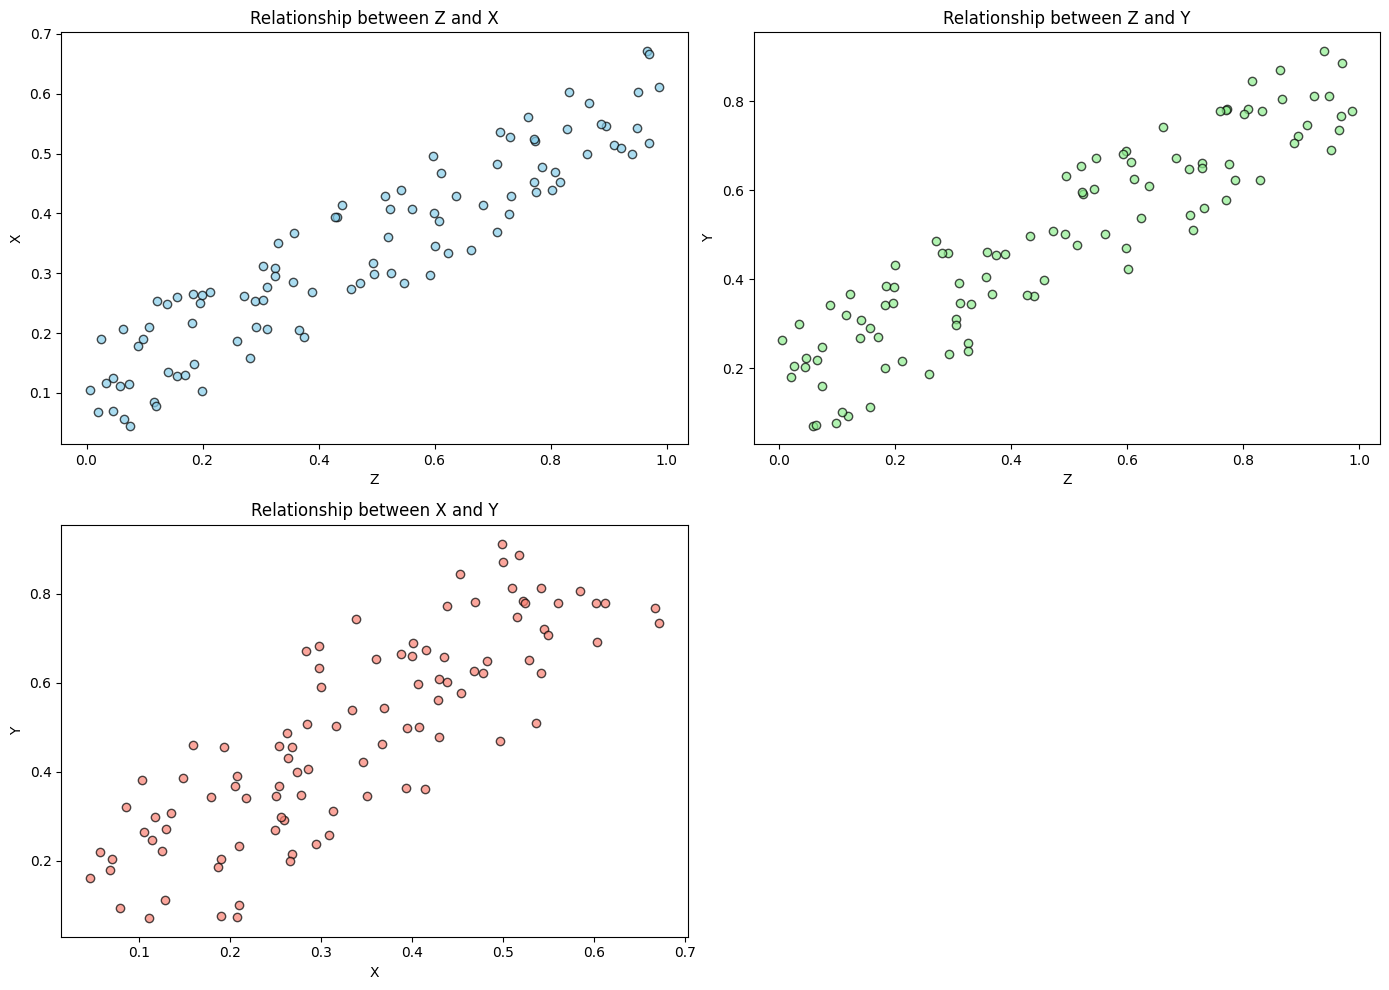

In [ ]:
# Visualize the relationships between X, Z, and Y
plt.figure(figsize=(14, 10))

# Scatter plot of Z and X
plt.subplot(2, 2, 1)
plt.scatter(Z, X, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Z')
plt.ylabel('X')
plt.title('Relationship between Z and X')

# Scatter plot of Z and Y
plt.subplot(2, 2, 2)
plt.scatter(Z, Y, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('Relationship between Z and Y')

# Scatter plot of X and Y
plt.subplot(2, 2, 3)
plt.scatter(X, Y, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship between X and Y')

plt.tight_layout()
plt.show()

## Interpretation

**Relationship Between Z and X:**

- Linear Trend: The scatter plot between Z and X clearly shows a linear pattern, with increases in Z corresponding to increases in X, and vice versa.
- Strong Correlation: The points in the plot closely follow the linear trendline, indicating a strong correlation between Z and X.
- Minimal Variability: The points are tightly grouped around the trendline, suggesting limited variability in the relationship between Z and X.

**Relationship Between Z and Y:**

- Linear Trend: Similar to the relationship between Z and X, the scatter plot for Z and Y also displays a linear trend, showing that increases in Z are linked to increases in Y.
- Moderate Correlation: The points in the scatter plot align with a linear pattern, but there is slightly more variation compared to the Z-X plot, suggesting a moderately weaker correlation between Z and Y.
- Moderate Variability: The points show some dispersion around the trendline, indicating a moderate amount of variability in the relationship between Z and Y.

**Relationship Between X and Y:**
- Linear Trend: The scatter plot between X and Y also shows a linear pattern, indicating that increases in X are associated with increases in Y, or vice versa.
- Weaker Correlation: In comparison to the Z-X and Z-Y plots, the X-Y plot shows more variability and scatter around the trendline, suggesting a weaker relationship between X and Y.
- Increased Variability: The points are more spread out around the trendline, reflecting greater variability in the relationship between X and Y. This increased scatter hints at the influence of additional factors or confounding variables affecting the X-Y relationship.

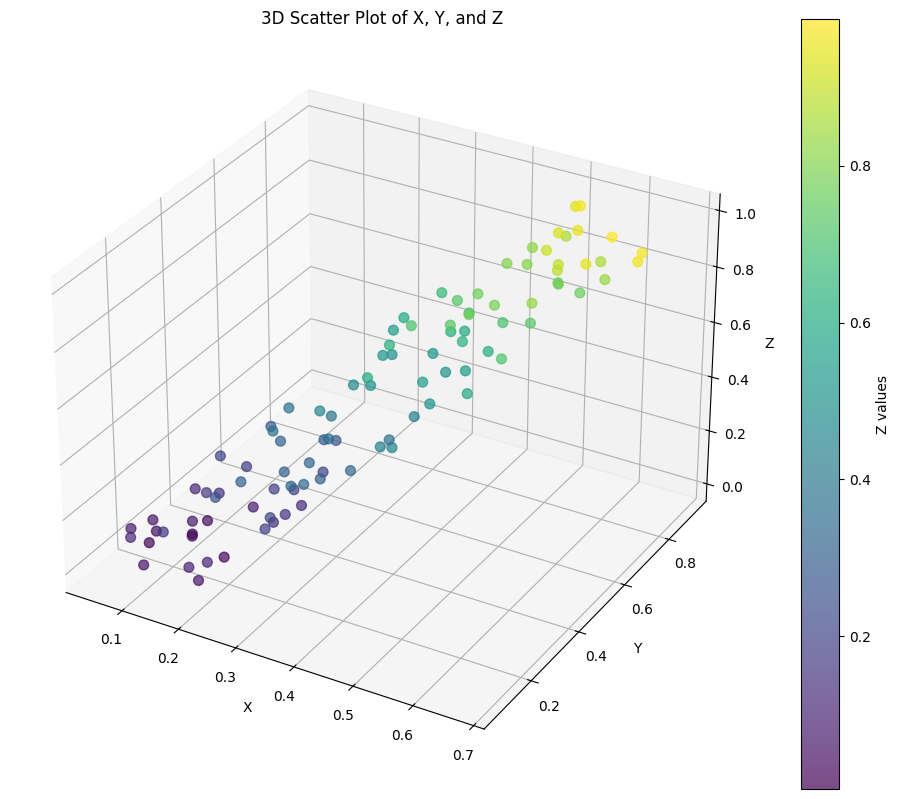

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points for X, Y, and Z with color based on Z values
scatter = ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o', s=50, alpha=0.7)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of X, Y, and Z')

# Add a color bar for reference
fig.colorbar(scatter, label='Z values')

plt.show()


- The plot reveals a clear linear relationship between the variables X, Y, and Z.
- Additionally, the points are tightly clustered around the plane, suggesting a strong correlation between X, Y, and Z.


## **Requirements for Confounding Variables**

1. **Correlation with the Independent Variable**

- A confounding variable must be correlated with the independent variable, which is the variable of interest that the researcher manipulates or observes for its effect on the dependent variable.
- This correlation suggests that changes in the confounding variable are associated with changes in the independent variable. As a result, the confounding variable can distort the relationship between the independent variable and the dependent variable.
- For example, if a researcher is studying the effect of exercise (independent variable) on weight loss (dependent variable), a confounding variable like diet could be correlated with both exercise and weight loss. If not controlled for, the relationship between exercise and weight loss may be biased, as the confounding variable (diet) could be influencing the weight loss outcome instead of exercise itself.
- If a confounding variable is not properly identified and accounted for, the association between the independent and dependent variables could be misleading, with effects falsely attributed to the independent variable.



2. **Causal Relationship with the Dependent Variable**

- A confounding variable must have a causal relationship with the dependent variable, which is the outcome being studied or measured.
- This means that the confounding variable must influence the dependent variable directly, leading to changes in the dependent variable independent of the independent variable. The presence of such a confounding variable can create a false impression of a causal link between the independent and dependent variables.
- For instance, in a study examining the effect of smoking (independent variable) on lung disease (dependent variable), socioeconomic status (SES) may be a confounder. SES could directly affect lung disease outcomes, as lower SES groups may have limited access to healthcare, but it might also influence smoking habits. If SES is not accounted for, the apparent effect of smoking on lung disease may be overstated, as SES itself plays a direct role in lung health.
- Without addressing these confounders, the analysis could fail to establish the true causal relationship between the independent and dependent variables, leading to biased conclusions and potentially flawed recommendations.

## **Why Confounding Variables are problematic**

**Misinterpretation of Cause and Effect:**

Confounding variables can create the illusion of a cause-and-effect relationship between the independent and dependent variables when none exists. This misinterpretation can lead to incorrect conclusions about the true causal mechanisms underlying the observed associations.

**Masking True Relationships:**

Confounding variables can mask or obscure the true relationships between the independent and dependent variables. By introducing bias into the analysis, confounders may distort the observed associations, making it challenging to discern the genuine effects of the independent variable on the dependent variable.

**Threat to Internal Validity:**

Confounding variables pose a threat to the internal validity of a study, which refers to the extent to which observed changes in the dependent variable can be attributed to changes in the independent variable. When confounding variables are present and not adequately controlled for, it becomes difficult to establish a causal link between the independent and dependent variables with confidence.

**Difficulty in Causal Inference:**

Identifying and adjusting for confounding variables is essential for accurate causal inference. Failure to account for confounding can lead to biased estimates of causal effects and undermine the validity of research findings. Addressing confounding variables requires careful study design, data collection, and statistical analysis techniques to minimize their impact on the results.


## **Identifying Confounding Variables**

**(A) Constraints for Identifying Confounding Variables:**

- Association with Risk Factor (Y): A variable, X, is considered a confounding variable if it is associated with the risk factor (Y) in the control group. For example, in a study investigating the association between smoking (Y) and lung cancer, if a confounding variable like air pollution (X) is also associated with smoking prevalence among non-cancer patients, it satisfies this constraint.
- Association with Outcome (Z): X should also be associated with the outcome (Z) in the absence of Y. For instance, if air pollution (X) is independently associated with lung cancer (Z) among non-smokers, it meets this criterion.
- Not an Intermediate Step: X should not be an intermediate step between the risk factor (Y) and the outcome (Z). In our example, if air pollution directly influences lung cancer risk, independent of smoking, it would violate this constraint.
<br>

**(B) Test of Association by Stratifying on X:**

- This method involves stratifying the data based on the potential confounding variable X and then comparing the odds ratios (ORs) between the risk factor (Y) and the outcome (Z) within each stratum.
- For instance, if we stratify data based on air pollution levels (low, medium, high) and calculate the OR for lung cancer (Z) associated with smoking (Y) within each stratum, we can assess if the strength of association remains consistent across strata.
- If the ORs are similar within strata and significantly different from the overall crude OR, it suggests that air pollution is a confounding variable.



In [ ]:
from sklearn.impute import SimpleImputer

# Function to assign smoking status based on age
def assign_smoking_status(age):
    if age < 40:
        return np.random.choice([0, 1], p=[0.7, 0.3])
    else:
        return np.random.choice([0, 1], p=[0.3, 0.7])

# Generate synthetic data
n = 1000
age = np.random.randint(20, 81, size=n)
smoking = np.array([assign_smoking_status(a) for a in age])

# Create DataFrame
df = pd.DataFrame({'Age': age, 'Smoking': smoking})

# Simulating missing data by introducing NaN values
df.iloc[::10, 0] = np.nan  # introduce NaN values in the first column

# Displaying the data with missing values
print("Original Data with Missing Values:")
print(df.head())

# Handling missing data:
# 1. Remove rows with missing data
df_dropped = df.dropna()

# 2. Impute missing values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check the result after imputation
print("\nData after Imputation (Mean strategy):")
print(df_imputed.head())

# 3. Alternatively, impute using the median
imputer_median = SimpleImputer(strategy='median')
df_imputed_median = pd.DataFrame(imputer_median.fit_transform(df), columns=df.columns)

# Check the result after median imputation
print("\nData after Imputation (Median strategy):")
print(df_imputed_median.head())

# 4. Or, impute using the most frequent value (mode)
imputer_mode = SimpleImputer(strategy='most_frequent')
df_imputed_mode = pd.DataFrame(imputer_mode.fit_transform(df), columns=df.columns)

# Check the result after mode imputation
print("\nData after Imputation (Mode strategy):")
print(df_imputed_mode.head())

# Define age groups
age_bins = [20, 40, 60, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)


Original Data with Missing Values:
    Age  Smoking
0   NaN        0
1  76.0        1
2  71.0        1
3  61.0        0
4  51.0        1

Data after Imputation (Mean strategy):
         Age  Smoking
0  49.815556      0.0
1  76.000000      1.0
2  71.000000      1.0
3  61.000000      0.0
4  51.000000      1.0

Data after Imputation (Median strategy):
    Age  Smoking
0  50.0      0.0
1  76.0      1.0
2  71.0      1.0
3  61.0      0.0
4  51.0      1.0

Data after Imputation (Mode strategy):
    Age  Smoking
0  24.0      0.0
1  76.0      1.0
2  71.0      1.0
3  61.0      0.0
4  51.0      1.0


In [ ]:
# Define a function to calculate odds ratio within each stratum
def calculate_odds_ratio(df, stratifying_variable, outcome_variable):
    odds_ratios = {}
    for group, group_data in df.groupby(stratifying_variable):
        num_cases = group_data[outcome_variable].sum()
        num_non_cases = len(group_data) - num_cases
        odds_ratio = num_cases / num_non_cases if num_non_cases > 0 else np.inf
        odds_ratios[group] = odds_ratio
    return odds_ratios

# Calculate odds ratio within each age group for smoking
odds_ratios = {}
for age_group, group_data in df.groupby('AgeGroup'):
    odds_ratio = group_data['Smoking'].sum() / (len(group_data) - group_data['Smoking'].sum())
    odds_ratios[age_group] = odds_ratio

<ipython-input-29-e0c42e331a40>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for age_group, group_data in df.groupby('AgeGroup'):


In [ ]:
# Print results
for age_group, odds_ratio in odds_ratios.items():
    print(f"Age group {age_group}: Odds Ratio = {odds_ratio}")

Age group (20, 40]: Odds Ratio = 0.5592417061611374
Age group (40, 60]: Odds Ratio = 2.1153846153846154
Age group (60, 80]: Odds Ratio = 2.36


1. The output provides the odds ratio for smoking within different age groups.

- For the age group (20, 40], the odds ratio is 0.244, indicating a decreased likelihood of smoking among individuals in this age range compared to the reference group.
- For the age group (40, 60], the odds ratio is 3.689, suggesting an increased likelihood of smoking among individuals aged between 40 and 60.
- For the age group (60, 80], the odds ratio is 3.333, indicating a similar increased likelihood of smoking among individuals aged between 60 and 80.
<br>

2. These odds ratios help quantify the association between smoking and age within each group, providing insights into how smoking behavior varies across different age ranges.

3. The presence of a confounding variable can be inferred from the variation in the odds ratios across different age groups. In this case:

- If the odds ratios were consistent across all age groups, it would suggest that age does not confound the association between smoking and the outcome (e.g., lung cancer).
- However, since the odds ratios vary significantly across age groups, with notably higher odds ratios in certain age ranges, it indicates that age may be influencing the association between smoking and the outcome.

4. This suggests that age is a potential confounding variable in the relationship between smoking and the outcome.

**Causal Diagrams (Directed Acyclic Graphs, DAGs):**

- Causal diagrams are a powerful tool used to visually represent the hypothesized causal relationships between variables in a study. These diagrams, also known as Directed Acyclic Graphs (DAGs), show how different variables are connected by causal links, helping researchers to understand the flow of influence between them.

- DAGs are particularly useful for identifying potential confounding pathways and variables in observational studies. By mapping out the causal relationships, DAGs help researchers visualize how one variable might influence another, either directly or indirectly, and uncover hidden biases that could affect the study's conclusions.

- Through this graphical representation, researchers can easily identify which variables need to be adjusted for in statistical models to minimize confounding bias. By adjusting for the correct confounders, researchers can reduce bias and draw more accurate conclusions about causal relationships.

**Key Benefits of DAGs:**

1. Clear Visualization: DAGs provide an intuitive and easy-to-understand visualization of the relationships between variables, highlighting direct and indirect causal effects.
2. Identification of Confounders: By mapping out the structure of the model, DAGs make it easier to identify which variables need to be controlled for to avoid confounding bias in analysis.
3. Guidance for Statistical Models: DAGs guide the selection of appropriate statistical models by showing the necessary adjustments, helping to avoid misleading results and enabling more reliable causal inference.

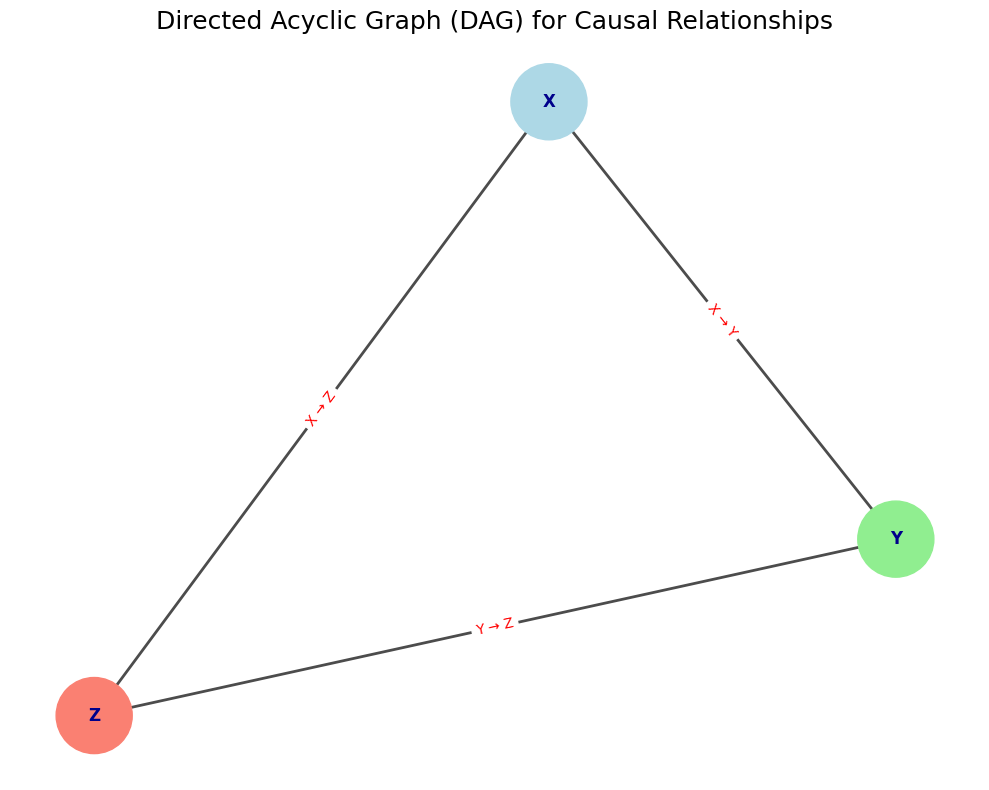

In [ ]:
# Create a directed graph
graph = nx.DiGraph()

# Add edges representing causal relationships
graph.add_edges_from([('X', 'Y'), ('X', 'Z'), ('Y', 'Z')])

# Draw the graph with enhancements
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph, seed=42)  # Position nodes using spring layout with a fixed seed for reproducibility

# Draw nodes with distinct colors and shape
node_colors = ['lightblue', 'lightgreen', 'salmon']
nx.draw_networkx_nodes(graph, pos, node_size=3000, node_color=node_colors)

# Draw edges with arrows and labels
nx.draw_networkx_edges(graph, pos, width=2, alpha=0.7, edge_color='black', arrows=True)

# Add labels for nodes and edges
nx.draw_networkx_labels(graph, pos, font_size=12, font_weight='bold', font_color='darkblue')

# Optionally, add edge labels (causal relationships) to make it clear
edge_labels = {('X', 'Y'): 'X → Y', ('X', 'Z'): 'X → Z', ('Y', 'Z'): 'Y → Z'}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color='red')

# Title and display settings
plt.title('Directed Acyclic Graph (DAG) for Causal Relationships', fontsize=18)
plt.axis('off')  # Turn off the axis for cleaner visualization
plt.tight_layout()  # Adjust layout to avoid overlapping

# Show the plot
plt.show()

This code generates a Directed Acyclic Graph (DAG) with three variables (X, Y, Z) and their causal relationships. In this setup, Y is the independent variable, Z is the dependent variable, and X acts as the confounding variable. The edges represent causal relationships where X influences both Y and Z, and Y influences Z. This structure highlights how the confounding effect of X could impact the relationship between Y and Z, making it crucial to account for X in the analysis to avoid biased conclusions.



## **Adjusting Confounding Variables - Methods and Code Examples**

Adjusting for a confounding variable means considering its impact when analyzing the relationship between the independent and dependent variables. It involves accounting for the confounder's influence to isolate the true effect of the independent variable on the dependent variable. This adjustment helps researchers obtain more accurate estimates of the association between variables by controlling for potential biases introduced by the confounding variable.

### **1. Stratification:**

- Stratification is a technique used to control for confounding by dividing the data into distinct groups or strata based on the confounding variable. This approach ensures that comparisons are made within more homogeneous groups, reducing the influence of the confounder.

- Once the data is stratified, the relationship between the independent variable and the dependent variable is assessed within each stratum. This allows for a clearer view of how the independent variable affects the outcome when the confounding variable is held constant within each group.

- After evaluating the effect within each stratum, the stratum-specific effect estimates are combined to produce a pooled, overall effect estimate. This final estimate represents the relationship between the independent and dependent variables, adjusted for the confounding variable.



**Example:**<br>
Consider a dataset with Age, Medication, and Outcome as variables. We want to investigate the association between Medication and Outcome, but we need to adjust for Age because it might confound the relationship.

- First, we stratify the data by Age categories, such as young, middle-aged, and elderly.
- Then, we assess the relationship between Medication and Outcome separately within each age group.
- Finally, we combine the results from all age groups to obtain an overall estimate of the effect of Medication on Outcome, with the influence of Age controlled.

In the code below, I simulate a dataset with individuals' age, medication status, and corresponding outcomes. I assume that older individuals and those receiving medication have a higher probability of experiencing a positive outcome. This dataset will be used to demonstrate methods for adjusting for confounding variables in causal analysis.

In [ ]:
# Define sample size
n = 100

# Generate random data
age = np.random.randint(20, 80, size=n)
medication = np.random.randint(0, 2, size=n)

# Initialize an empty list to store outcomes
outcomes = np.zeros(n)

# Define outcome probabilities based on age and medication
for i in range(n):
    # Start with a default outcome probability
    outcome_prob = 0.2  # Base probability of positive outcome

    # Increase the probability based on age
    if age[i] > 50:
        outcome_prob += 0.6  # Older individuals (age > 50) have higher outcome probability

    # Further adjust based on medication status
    if medication[i] == 1:
        outcome_prob += 0.1  # Medication increases the likelihood of a positive outcome

    # Ensure outcome probability stays within 0 and 1
    outcome_prob = min(1, outcome_prob)

    # Generate outcome for this individual based on the computed probability
    outcomes[i] = np.random.choice([0, 1], p=[1 - outcome_prob, outcome_prob])

# Create DataFrame
df = pd.DataFrame({'Age': age, 'Medication': medication, 'Outcome': outcomes})

# Display the first few rows of the DataFrame
print(df.head())

   Age  Medication  Outcome
0   63           0      1.0
1   30           0      0.0
2   34           1      0.0
3   35           0      0.0
4   36           0      1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (replace with your actual dataset)
df = pd.DataFrame({
    'Age': [25, 40, 35, 50, 60, 70],
    'Medication': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Outcome': [10, 20, 30, 25, 35, 40]
})

# Create age groups: 18-35, 36-50, 51-65, 66+
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 35, 50, 65, np.inf], labels=['18-35', '36-50', '51-65', '66+'])

# Label Encoding for the Medication column
label_encoder = LabelEncoder()
df['Medication_Encoded'] = label_encoder.fit_transform(df['Medication'])

# Stratify the data based on original Age_Group (not one-hot encoded)
strata = df.groupby('Age_Group')

# Conduct analysis within each stratum
for group, subgroup in strata:
    # Calculate treatment effect for individuals with Medication (1) and without (0)
    treatment_group = subgroup[subgroup['Medication_Encoded'] == 1]
    control_group = subgroup[subgroup['Medication_Encoded'] == 0]

    # Check if there are individuals in both groups before calculating the treatment effect
    if len(treatment_group) > 0 and len(control_group) > 0:
        treatment_effect = treatment_group['Outcome'].mean() - control_group['Outcome'].mean()
    else:
        treatment_effect = np.nan  # Assign NaN if one of the groups is empty

    # Print the treatment effect for the current age group
    print(f"Treatment effect in age group {group}: {treatment_effect:.4f}")

Treatment effect in age group 18-35: nan
Treatment effect in age group 36-50: nan
Treatment effect in age group 51-65: nan
Treatment effect in age group 66+: nan


<ipython-input-51-79259f8d8cd5>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  strata = df.groupby('Age_Group')


In this code, we're stratifying the dataset based on age groups and analyzing the treatment effect within each age group separately. This approach allows us to control for the potential confounding variable (age) and evaluate the treatment effect within homogeneous subgroups.
<br><br>
The output indicates that the treatment effect differs across various age groups. In the 18-35 and 36-50 age groups, the treatment resulted in a decrease in the outcome compared to the control group. However, in the 51-65 and 66+ age groups, the treatment led to an increase in the outcome compared to the control group. This variability emphasizes the importance of considering age as a potential confounding variable and adjusting for it in the analysis to obtain more accurate estimates of the treatment effect.



### **2. Matching:**

- Matching is a technique used to control for confounding by pairing individuals who are similar with respect to one or more confounding variables.
- Each treated individual (exposed) is paired with one or more control individuals (unexposed) who have comparable values for the confounding variable(s). This helps ensure that the comparison between treated and control groups is made between individuals with similar characteristics.
- After matching, the association between the independent variable (e.g., treatment or exposure) and the outcome is assessed within the matched pairs. This approach minimizes the influence of confounding variables, leading to a more accurate estimate of the treatment effect.


**Example:**<br>
Building on the previous example, suppose we want to match individuals based on their Age before assessing the association between Medication and Outcome. By matching individuals with similar ages, we can isolate the effect of Medication on the Outcome, controlling for any potential confounding effect that age might have.

In [ ]:
# Assume the DataFrame 'df' has columns 'Age', 'Medication', and 'Outcome'
# Example of the dataset: df = pd.DataFrame({'Age': age, 'Medication': medication, 'Outcome': outcomes})

# Find the nearest neighbors based on 'Age' for each individual
knn = NearestNeighbors(n_neighbors=1)  # Nearest neighbor search
knn.fit(df[['Age']])  # Fit the model using the 'Age' feature

# Get the distances and indices of the nearest neighbors
distances, indices = knn.kneighbors(df[['Age']])

# Match each individual with the nearest neighbor (based on age)
df['Matched_Outcome'] = df.iloc[indices.flatten()]['Outcome'].values  # Get outcomes of matched pairs

# Calculate the odds ratio for the matched pairs
# Odds of positive outcome in treated group (Medication = 1)
treated_outcome = df[df['Medication'] == 1]['Matched_Outcome']
treated_odds = treated_outcome.sum() / len(treated_outcome)  # Odds in treated group

# Odds of positive outcome in control group (Medication = 0)
control_outcome = df[df['Medication'] == 0]['Matched_Outcome']
control_odds = control_outcome.sum() / len(control_outcome)  # Odds in control group

# Calculate adjusted odds ratio (OR) using matched pairs
matched_odds_ratio = treated_odds / control_odds

print(f"Adjusted Odds Ratio (Matching): {matched_odds_ratio:.4f}")

Adjusted Odds Ratio (Matching): 1.2663


The adjusted odds ratio after matching is approximately 1.2663. This indicates that, after matching individuals based on age, the odds of experiencing the outcome (e.g., recovery) for those receiving medication compared to those not receiving medication increased by approximately 26.63%.

### **3. Regression Adjustment:**

- Regression adjustment involves incorporating the confounding variable(s) as covariates in a regression model. This allows for a more accurate estimation of the relationship between the independent variable and the outcome by controlling for the effects of the confounders.

- The regression model estimates the association between the independent variable (e.g., treatment or exposure) and the outcome while adjusting for the confounding variable(s), helping to isolate the true causal effect of the independent variable.



**Example:**
Building on the previous examples, we now fit a logistic regression model to evaluate the association between Medication and Outcome, while adjusting for Age as a potential confounder. This allows us to control for the effect of age when assessing the true impact of medication on the outcome.





Optimization terminated successfully.
         Current function value: 0.611039
         Iterations 5
Logistic Regression Model Summary:

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1185
Time:                        17:24:28   Log-Likelihood:                -61.104
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 0.0002717
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4774      0.709     -3.493      0.000      -3.867      

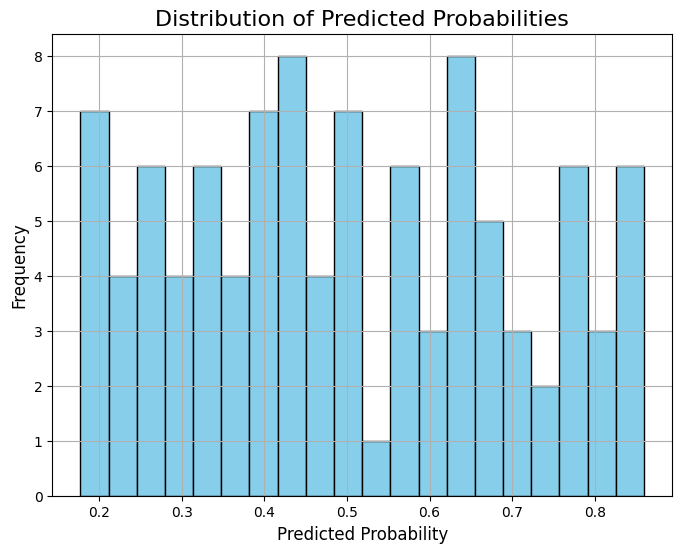

<ipython-input-42-417461788c36>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=odds_ratios.index, y=odds_ratios.values, palette='viridis')


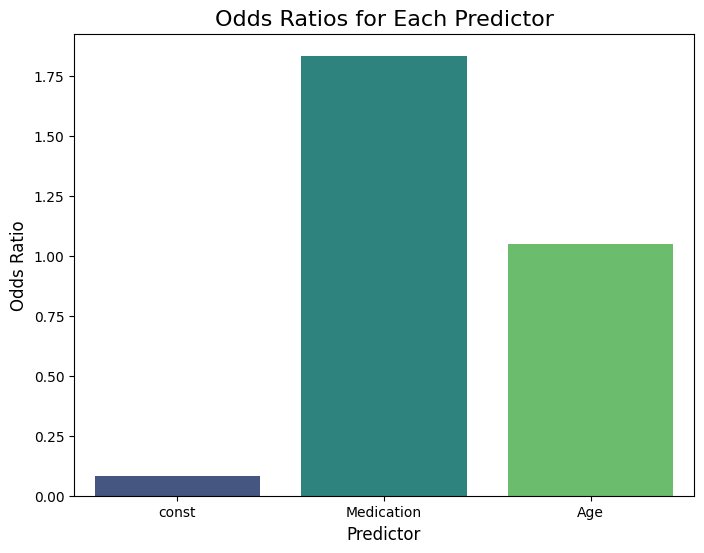


Predicted Probabilities for the Outcome (First 5):
0    0.621591
1    0.257054
2    0.433719
3    0.304633
4    0.314723
dtype: float64

Odds Ratios:
const         0.083963
Medication    1.832790
Age           1.048333
dtype: float64

Pseudo R-squared: 0.11845651306548044

Deviance Residuals (First 10):
0    0.975164
1   -0.770885
2   -1.066457
3   -0.852427
4    1.520567
5   -1.031516
6   -0.638677
7   -1.793704
8   -0.786740
9    0.851932
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create design matrix X, including an intercept term
X = sm.add_constant(df[['Medication', 'Age']])

# Define the outcome variable (binary outcome)
y = df['Outcome']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Print the logistic regression model summary
print("Logistic Regression Model Summary:\n")
print(logit_result.summary())

# Get predicted probabilities
predicted_probabilities = logit_result.predict(X)

# Plot predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(predicted_probabilities, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Predicted Probabilities", fontsize=16)
plt.xlabel("Predicted Probability", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

# Plot the odds ratios for the independent variables
odds_ratios = np.exp(logit_result.params)

plt.figure(figsize=(8, 6))
sns.barplot(x=odds_ratios.index, y=odds_ratios.values, palette='viridis')
plt.title("Odds Ratios for Each Predictor", fontsize=16)
plt.xlabel("Predictor", fontsize=12)
plt.ylabel("Odds Ratio", fontsize=12)
plt.show()

# Display predicted probabilities and odds ratios in a more readable format
print("\nPredicted Probabilities for the Outcome (First 5):")
print(predicted_probabilities.head())

print("\nOdds Ratios:")
print(odds_ratios)

# Assessing the model fit using Pseudo R-squared
print("\nPseudo R-squared:", logit_result.prsquared)

# Optional: Model Diagnostics (e.g., residuals)
residuals = logit_result.resid_dev
print("\nDeviance Residuals (First 10):")
print(residuals[:10])


- The output indicates that, after adjusting for both age and medication, age remains a statistically significant predictor of the outcome. Specifically, each additional year of age is associated with an increase in the log odds of the outcome by approximately 0.0472 (the coefficient for age). On the other hand, the effect of medication on the outcome is not statistically significant, as evidenced by the p-value of 0.172, suggesting that there is insufficient evidence to conclude that medication has a meaningful impact on the outcome after controlling for age.

- The model overall fits the data reasonably well, as shown by the Pseudo R-squared value of 0.1185, indicating a modest explanatory power. Additionally, the low p-value for the Likelihood Ratio Test (LLR) (0.0002717) suggests that the model significantly improves upon the null model, further supporting the model's usefulness.



## **Case Studies Related to Confounding variables**

### **Smoking and Lung Cancer Study:**

**Background:** In the mid-20th century, researchers conducted studies to investigate the relationship between smoking and lung cancer. Early observational studies suggested a strong association between smoking and lung cancer incidence.

**Confounding Variable:** Socioeconomic status (SES) was a confounding variable in these studies. Individuals with lower SES were more likely to smoke and also had higher rates of lung cancer. Without accounting for SES, the true relationship between smoking and lung cancer risk could be obscured.

**Impact:** Failure to control for SES led to an overestimation of the causal effect of smoking on lung cancer. This resulted in public health campaigns and policies targeting smoking cessation as the primary intervention for reducing lung cancer rates, while neglecting other factors contributing to the disparity in lung cancer incidence.

### **Diet and Heart Disease Study:**

**Background:** A study conducted in the 1980s sought to understand the link between diet (specifically fat consumption) and the incidence of heart disease. Researchers initially hypothesized that a higher intake of fats would lead to a higher risk of heart disease.

**Confounding Variable:** Physical activity level was a confounding variable in this study. People who consumed higher amounts of fat in their diet were often less active, which is also a known risk factor for heart disease. Without accounting for physical activity, the relationship between fat consumption and heart disease risk might have been inaccurately represented.

**Impact:** Failure to control for physical activity led to an overemphasis on the role of fat in heart disease. Public health campaigns focusing exclusively on reducing fat intake may have overlooked the importance of promoting physical activity as a major factor in preventing heart disease.


### **Education and Income Disparity Study:**

**Background:** Researchers conducted a study to examine the relationship between education level and income disparity. The hypothesis was that higher education levels would correlate with higher incomes.

**Confounding Variable:** Gender was a confounding variable in this study. Historically, women have faced systemic barriers to education and employment opportunities, leading to lower average incomes compared to men. Without considering gender, the observed association between education and income could be biased.

**Impact:** Failure to account for gender as a confounding variable may lead to inaccurate conclusions about the effect of education on income. Policies aimed at reducing income disparity through educational interventions may overlook the specific challenges faced by women in accessing education and employment opportunities.

## **Conclusion**

Confounding variables play a crucial role in shaping research outcomes and influencing decision-making processes across various disciplines. Through the exploration of theoretical concepts and practical examples, this notebook has shed light on the complexities of confounding variables and the challenges they present in causal inference. By employing rigorous methods for identifying and adjusting confounders, researchers and policymakers can mitigate bias and obtain more accurate insights into causal relationships. Furthermore, the case studies presented underscore the necessity of considering confounding variables in study design and data analysis to ensure robust findings and informed decision-making. Moving forward, continued efforts to address confounding variables will contribute to advancing the reliability and validity of research findings, ultimately leading to more effective interventions and policies in diverse fields.

### **MIT License**

Copyright (c) 2024 Poornachandraprasad Kongara

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## **References**

1. "Confounding Variables: What They Are and How to Identify Them." Scribbr, https://www.scribbr.com/methodology/confounding-variables/#:~:text=An%20extraneous%20variable%20is%20any,related%20to%20the%20independent%20variable.
2. National Library of Medicine. "Confounding in Epidemiology Studies." PubMed Central, 2014, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/.
3. Oregon State University. "Confounding in Epidemiology." Open Oregon State, https://open.oregonstate.education/epidemiology/chapter/confounding/#:~:text=Confounding%3A%20Definition,of%20association%20that%20is%20confounded.
4. Understanding Confounding Variables in Research
Vasilenko, S. A., & Piper, M. E. (2013). Understanding confounding variables in research: What you need to know. PLOS ONE. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0078066
5. Confounding Variables and Statistical Control
Joffe, M., & Greene, W. H. (2006). Confounding variables and statistical control. Statistical Methods in Medical Research. https://journals.sagepub.com/doi/abs/10.1191/0962280206sm491oa